## **Web and Social Media Analytics**

#### Mounting Google Drive with COLAB

#### ***Problem Statement***
Customer is a mobile manufacturer based in the US, who entered the market three years ago. As a new entrant in the sector, they want to understand their competitors and preferences of their users so that they can design their strategies accordingly.They want to tweak the marketing strategies to add more value to their brand, provide features to customers that add the most value, and close the demand-supply gap. Their objective is to increase the market share as well as the brand value.

#### ***Solution:***
The solution has been divided into two parts. <br>
Part 1: Deriving the business insights that are useful for product development and marketing. <br>
Part 2: Creating a sentiment classification engine.

### **Part 1: Deriving the business insights that are useful for product development and marketing.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### ***Importing Libraries***

In [ ]:
# importing libraries to read to dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Reading the meta data
# importing libraries

import gzip
import shutil

#Path to the meta data zip file 'meta_cell_phones_and_Accessories' is the folder name under 'My Drive'
path1 = '/content/drive/MyDrive/Web_and_social_media_analytics/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
path2 = '/content/drive/MyDrive/Web_and_social_media_analytics/meta_Cell_Phones_and_Accessories.json'

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries. 
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [ ]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [ ]:
#converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

#creating new .csv file for meta
df_meta.to_csv('/content/drive/MyDrive/Web_and_social_media_analytics/meta.csv')

In [ ]:
#reading meta.csv file
df_meta=pd.read_csv('/content/drive/MyDrive/Web_and_social_media_analytics/meta.csv')

<ipython-input-8-a7bd0e63ad83>:2: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta=pd.read_csv('/content/drive/MyDrive/Web_and_social_media_analytics/meta.csv')


In [ ]:
#Reading the .csv file of the phone data into a dataframe

df_phonedata = pd.read_csv('/content/drive/MyDrive/Web_and_social_media_analytics/Cell_Phones_and_Accessories_5.csv')

<ipython-input-9-92673fec35c8>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_phonedata = pd.read_csv('/content/drive/MyDrive/Web_and_social_media_analytics/Cell_Phones_and_Accessories_5.csv')


In [ ]:
df_phonedata.head()

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


### **Data Understanding and Preparation**

In [ ]:
df_phonedata.head()

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


In [ ]:
df_phonedata.shape

(1128437, 12)

In [ ]:
df_phonedata.describe()

,overall,unixReviewTime
count,1.128437e+06,1.128437e+06
mean,4.221383e+00,1.440400e+09
std,1.231917e+00,4.569215e+07
min,1.000000e+00,1.035331e+09
25%,4.000000e+00,1.416355e+09
50%,5.000000e+00,1.444349e+09
75%,5.000000e+00,1.470442e+09
max,5.000000e+00,1.538438e+09


In [ ]:
# Checking the information related to each column details
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 95.8+ MB


In [ ]:
#checking for null values
df_phonedata.isnull().sum() 

overall                   0
verified                  0
reviewerID                0
asin                      0
style                523196
reviewerName            156
reviewText              768
summary                 525
unixReviewTime            0
vote                1036403
image               1101330
review_sentiment          0
dtype: int64

In [ ]:
df_phonedata.isnull().sum()/len(df_phonedata)*100

overall              0.000000
verified             0.000000
reviewerID           0.000000
asin                 0.000000
style               46.364662
reviewerName         0.013824
reviewText           0.068059
summary              0.046525
unixReviewTime       0.000000
vote                91.844117
image               97.597828
review_sentiment     0.000000
dtype: float64

In [ ]:
# fill null values in vote to 0
df_phonedata['vote'].fillna(0,inplace=True)

In [ ]:
# droping the columns with more than 40% null values
df_phonedata.drop(columns=['style', 'image'], axis=1, inplace=True)

In [ ]:
df_phonedata.isnull().sum()/len(df_phonedata)*100

overall             0.000000
verified            0.000000
reviewerID          0.000000
asin                0.000000
reviewerName        0.013824
reviewText          0.068059
summary             0.046525
unixReviewTime      0.000000
vote                0.000000
review_sentiment    0.000000
dtype: float64

In [ ]:
# droping the rows with null counts
df_phonedata = df_phonedata[df_phonedata['reviewText'].notna()]

In [ ]:
#Transforming unixReview time to date time format in phone data
from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))


In [ ]:
df_phonedata.isnull().sum()/len(df_phonedata)*100

overall             0.000000
verified            0.000000
reviewerID          0.000000
asin                0.000000
reviewerName        0.013745
reviewText          0.000000
summary             0.042034
unixReviewTime      0.000000
vote                0.000000
review_sentiment    0.000000
Date&Time           0.000000
dtype: float64

### **Meta Data Understanding and Preparation**

In [ ]:
df_meta.head()

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,0,"['Cell Phones & Accessories', 'Accessories', '...",NaN,[],NaN,Trollies Sing a Long Party VHS,[],[],NaN,NaN,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,NaN,NaN,NaN,6303195164
1,1,"['Cell Phones & Accessories', 'Accessories', '...",NaN,[],NaN,La Pura VHS,[],[],NaN,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,NaN,NaN,NaN,630524412X
2,2,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['New items to give you a new good mood, welco...",NaN,Leopard Thanksgiving Easter PC Black Case for ...,[],[],NaN,NaN,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,NaN,NaN,NaN,6310200240
3,3,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['A brand-new, unused, unopened, undamaged ite...",NaN,Puppies Faceplate Hard Case Protector for Net1...,[],[],NaN,Live2Pedal,['Protect your phone with style through this A...,"['>#6,368,825 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,6786501710
4,4,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['A brand-new, unused, unopened, undamaged ite...",NaN,White Wolf Faceplate Protector Hard Case for S...,[],[],NaN,wirelessoutletusa,['Protect your phone with style through this A...,"['>#2,672,454 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,6786501273


In [ ]:
df_meta.shape

(590071, 19)

In [ ]:
# Checking the information related to each column details
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590071 entries, 0 to 590070
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    590071 non-null  int64 
 1   category      590071 non-null  object
 2   tech1         6585 non-null    object
 3   description   590071 non-null  object
 4   fit           43 non-null      object
 5   title         590062 non-null  object
 6   also_buy      590071 non-null  object
 7   image         590071 non-null  object
 8   tech2         231 non-null     object
 9   brand         577311 non-null  object
 10  feature       590071 non-null  object
 11  rank          590071 non-null  object
 12  also_view     590071 non-null  object
 13  details       590071 non-null  object
 14  main_cat      586685 non-null  object
 15  similar_item  50931 non-null   object
 16  date          45880 non-null   object
 17  price         127564 non-null  object
 18  asin          590071 non

In [ ]:
df_meta.describe()

,Unnamed: 0
count,590071.000000
mean,295035.000000
std,170338.969683
min,0.000000
25%,147517.500000
50%,295035.000000
75%,442552.500000
max,590070.000000


In [ ]:
#dropping duplicates in ASIN

df_meta.drop_duplicates(subset='asin',inplace=True)

In [ ]:
#checking for null values
df_meta.isnull().sum() 

Unnamed: 0           0
category             0
tech1           582783
description          0
fit             589313
title                9
also_buy             0
image                0
tech2           589125
brand            12734
feature              0
rank                 0
also_view            0
details              0
main_cat          3386
similar_item    538470
date            543568
price           461899
asin                 0
dtype: int64

In [ ]:
df_meta = df_meta[df_meta["category"].apply(lambda x:x[31:35]=="Cell")]

In [ ]:
df_meta.head()

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
36,36,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...",NaN,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900...","['>#6,356,920 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,8050110508
1274,1274,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,['Standard package: 1 x original phone 1 x Qua...,NaN,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",['https://images-na.ssl-images-amazon.com/imag...,NaN,Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...","['>#32,759 in Electronics (See Top 100 in Elec...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",NaN,B00005KBGR
1295,1295,"['Cell Phones & Accessories', 'Cell Phones']",NaN,"[""The Nokia 5180i is a handset offered by Trac...",NaN,Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Nokia,[],[],[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00005S0M4
1354,1354,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,"['Based on Motorola&#x92;s i90c phone, the i95...",NaN,Motorola i95cl Phone (Nextel),[],['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,[],"['>#3,798,962 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00006J9HH
1361,1361,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,['This is a GSM Samsung R225 cellular phone th...,NaN,T-Mobile Dual-Band Wireless Phone,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Samsung,[],"['>#5,552,033 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00006LIQB


In [ ]:
df_meta.isnull().sum()/len(df_meta)*100

Unnamed: 0        0.000000
category          0.000000
tech1            99.683318
description       0.000000
fit             100.000000
title             0.000000
also_buy          0.000000
image             0.000000
tech2            99.908060
brand             1.256512
feature           0.000000
rank              0.000000
also_view         0.000000
details           0.000000
main_cat          0.143018
similar_item     70.037798
date             97.589131
price            82.194300
asin              0.000000
dtype: float64

In [ ]:
#dropping columns with null values in meta 
df_meta.drop(['tech1','tech2','fit','date'], axis = 1, inplace = True) 

Price is important feature, so will impute with the mean value of brand's price.

In [ ]:
df_meta['price'].value_counts()

$40.08                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
# impute null where price having descriptive text
df_meta["price"]=[np.nan if len(str(x))>15 else x for x in df_meta["price"]]

In [ ]:
df_meta['price'].value_counts()

$40.08     133
$27.57     129
$16.00      44
$49.99      38
$54.99      30
          ... 
$159.06      1
$82.00       1
$272.98      1
$37.28       1
$75.24       1
Name: price, Length: 722, dtype: int64

In [ ]:
# replace $ to none and convert price to float
df_meta["price"]= df_meta["price"].str.replace("$",'')


<ipython-input-36-6526b3600540>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_meta["price"]= df_meta["price"].str.replace("$",'')


In [ ]:
# replace , to none
df_meta["price"]= df_meta["price"].str.replace(",",'')

In [ ]:
# converting price column from object dtype to numeric
df_meta['price']= pd.to_numeric(df_meta['price'], errors='coerce')

In [ ]:
# checking the brand wise null value
df_meta[df_meta["price"].isnull()]['brand'].value_counts()

Samsung         1209
LG               616
Motorola         591
Nokia            452
BLU              440
                ... 
Social Drive       1
MYSAGA             1
GoPro              1
LSoug              1
BEISTE             1
Name: brand, Length: 873, dtype: int64

In [ ]:
# imputing null price with their brand's mean price 
df_meta['price'] = df_meta['price'].fillna(df_meta.groupby('brand')['price'].transform('mean'))

In [ ]:
df_meta.isnull().sum()/len(df_meta)*100

Unnamed: 0       0.000000
category         0.000000
description      0.000000
title            0.000000
also_buy         0.000000
image            0.000000
brand            1.256512
feature          0.000000
rank             0.000000
also_view        0.000000
details          0.000000
main_cat         0.143018
similar_item    70.037798
price           22.096230
asin             0.000000
dtype: float64

In [ ]:
#dropping columns with null values in meta 
df_meta.drop(['similar_item'], axis = 1, inplace = True) 

In [ ]:
df_meta.isnull().sum()/len(df_meta)*100

Unnamed: 0      0.000000
category        0.000000
description     0.000000
title           0.000000
also_buy        0.000000
image           0.000000
brand           1.256512
feature         0.000000
rank            0.000000
also_view       0.000000
details         0.000000
main_cat        0.143018
price          22.096230
asin            0.000000
dtype: float64

In [ ]:
# also dropping main_cat as we only require cellphone data
df_meta.drop(['main_cat'], axis=1, inplace=True)

# as we are peforming text analysis, image column is not required
df_meta.drop(['image'], axis=1, inplace=True)

In [ ]:
# extracting rank in cellphones and acessories 
df_meta["new_rank"]= df_meta["rank"].str.extract(pat='([^>#](\d{0,3},)?(\d{3},)?\d{0,3}\s*in Cell Phones & Accessories)')[0]
df_meta["new_rank"]=df_meta["new_rank"].str.replace(">#","").str.replace("in Cell Phones & Accessories","").str.replace(",","")

In [ ]:
# converting new rank column to integer
df_meta["new_rank"] = df_meta["new_rank"].astype("float")

In [ ]:
# dropping rank column as we got new_rank column
df_meta.drop(["rank"],axis=1, inplace=True)

In [ ]:
df_meta.head()

,Unnamed: 0,category,description,title,also_buy,brand,feature,also_view,details,price,asin,new_rank
36,36,"['Cell Phones & Accessories', 'Cell Phones', '...","['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...",UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900...",[],{},NaN,8050110508,6356920.0
1274,1274,"['Cell Phones & Accessories', 'Cell Phones', '...",['Standard package: 1 x original phone 1 x Qua...,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0...",{},92.513680,B00005KBGR,NaN
1295,1295,"['Cell Phones & Accessories', 'Cell Phones']","[""The Nokia 5180i is a handset offered by Trac...",Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],Nokia,[],[],{},92.513680,B00005S0M4,NaN
1354,1354,"['Cell Phones & Accessories', 'Cell Phones', '...","['Based on Motorola&#x92;s i90c phone, the i95...",Motorola i95cl Phone (Nextel),[],NaN,[],[],{},NaN,B00006J9HH,3798962.0
1361,1361,"['Cell Phones & Accessories', 'Cell Phones', '...",['This is a GSM Samsung R225 cellular phone th...,T-Mobile Dual-Band Wireless Phone,[],Samsung,[],[],{},117.247465,B00006LIQB,5552033.0


#### **Merging Dataframe**

In [ ]:
# we will use innerjoin to merge two dataframe 
df_merged = pd.merge(df_phonedata, df_meta, how='inner', on=['asin'])

In [ ]:
df_merged.head()

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment,...,category,description,title,also_buy,brand,feature,also_view,details,price,new_rank
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,2.0,NEGATIVE,...,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,3059436.0
1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,15.0,POSITIVE,...,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,3059436.0
2,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,11.0,NEGATIVE,...,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,3059436.0
3,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,4.0,POSITIVE,...,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,3059436.0
4,3.0,False,A3NOBH42C7UI5M,B0000E3GWH,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,12.0,POSITIVE,...,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,3059436.0


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63838 entries, 0 to 63837
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           63838 non-null  float64
 1   verified          63838 non-null  bool   
 2   reviewerID        63838 non-null  object 
 3   asin              63838 non-null  object 
 4   reviewerName      63829 non-null  object 
 5   reviewText        63838 non-null  object 
 6   summary           63821 non-null  object 
 7   unixReviewTime    63838 non-null  int64  
 8   vote              63838 non-null  object 
 9   review_sentiment  63838 non-null  object 
 10  Date&Time         63838 non-null  object 
 11  Unnamed: 0        63838 non-null  int64  
 12  category          63838 non-null  object 
 13  description       63838 non-null  object 
 14  title             63838 non-null  object 
 15  also_buy          63838 non-null  object 
 16  brand             63772 non-null  object

In [ ]:
#creating new .csv for merged data
df_merged.to_csv('/content/drive/MyDrive/Web_and_social_media_analytics/review.csv') 

In [ ]:
df_reviews =pd.read_csv('/content/drive/MyDrive/Web_and_social_media_analytics/review.csv')

In [ ]:
df_reviews.head()

,Unnamed: 0.1,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,category,description,title,also_buy,brand,feature,also_view,details,price,new_rank
0,0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,2.0,...,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,3059436.0
1,1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,15.0,...,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,3059436.0
2,2,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,11.0,...,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,3059436.0
3,3,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,4.0,...,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,3059436.0
4,4,3.0,False,A3NOBH42C7UI5M,B0000E3GWH,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,12.0,...,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,3059436.0


In [ ]:
# after merging dataframes lets change datatypes of boolean columns to integer (true =1, false=0)
df_reviews["verified"].replace({False: 0, True: 1}, inplace=True)

In [ ]:
# copied merged file for converting it to excel format
df_copy = df_reviews.copy()

In [ ]:
pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 4.5 MB/s eta 0:00:00


In [ ]:
#saving it as xlsx for tableau analysis
df_copy.to_excel("/content/drive/MyDrive/Web_and_social_media_analytics/tableau_data.xlsx", engine='xlsxwriter')

##### ***Checking counts of positive and negative table***

In [ ]:
df_reviews.columns

Index(['Unnamed: 0.1', 'overall', 'verified', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'review_sentiment', 'Date&Time', 'Unnamed: 0', 'category',
       'description', 'title', 'also_buy', 'brand', 'feature', 'also_view',
       'details', 'price', 'new_rank'],
      dtype='object')

In [ ]:
df_reviews['review_sentiment'].value_counts()

POSITIVE    47677
NEGATIVE    16161
Name: review_sentiment, dtype: int64

***Review Sentiment vs Overall Rating***

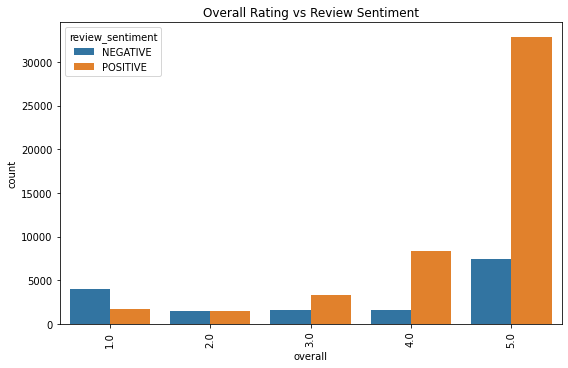

In [ ]:
plt.figure(figsize=[8,5])
sns.countplot(data=df_reviews,x=df_reviews["overall"],hue=df_reviews["review_sentiment"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Overall Rating vs Review Sentiment")
plt.show()

Observations: From above plot we can say that positive reviews have high overall rating as expected. For rating 1 the negative reviews are more. <br>

***Top 10 Brands by review count***

In [ ]:
# top 10 brand having more count of reviews
df_reviews['brand'].value_counts()[:10]

Samsung       16195
BLU            9328
LG             6657
Motorola       4922
Nokia          4885
Apple          4049
BlackBerry     3656
HTC            2453
Sony           1556
Huawei         1401
Name: brand, dtype: int64

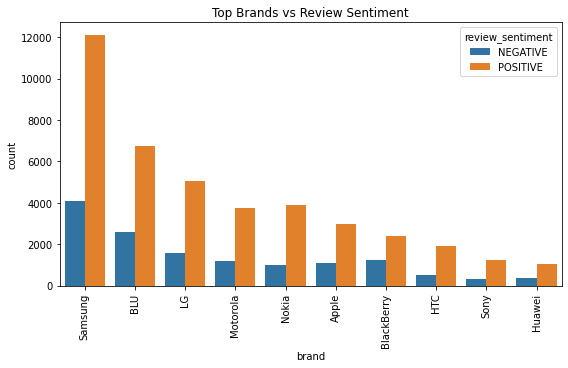

In [ ]:
plt.figure(figsize=[8,5])
sns.countplot(data=df_reviews,x=df_reviews["brand"],hue=df_reviews["review_sentiment"],order=df_reviews["brand"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Top Brands vs Review Sentiment")
plt.show()

Observations: From the plot we can observe that Samsung brand has the highest number of positive reviews.

***Top brands Vs their ranks in cellphone category***

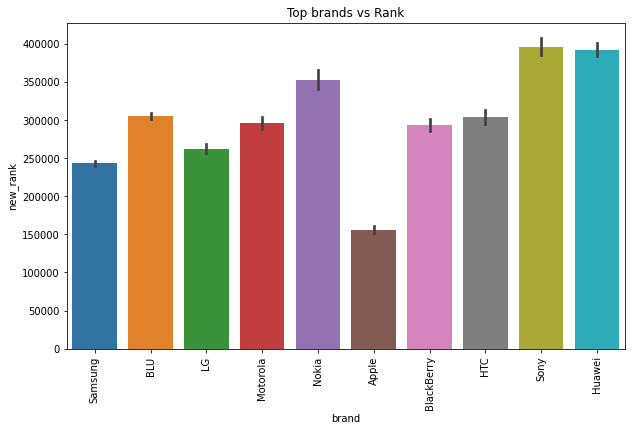

In [ ]:
plt.figure(figsize=[10,6])
sns.barplot (data=df_reviews,x=df_reviews["brand"],y=df_reviews["new_rank"],order=df_reviews["brand"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
#plt.tight_layout()
plt.title("Top brands vs Rank")
plt.show()

***Reviews verified***

In [ ]:
df_reviews["verified"].value_counts()

1    54994
0     8844
Name: verified, dtype: int64

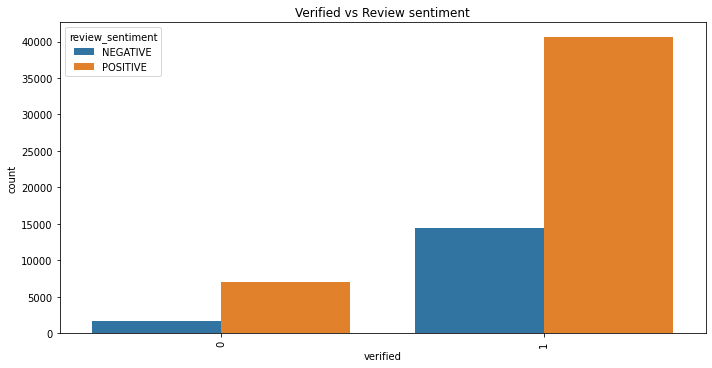

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(data=df_reviews,x=df_reviews["verified"],hue=df_reviews["review_sentiment"])

plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Verified vs Review sentiment")
plt.show()

We can observe that majority of the reviews are verified.

***Number of reviews per year***

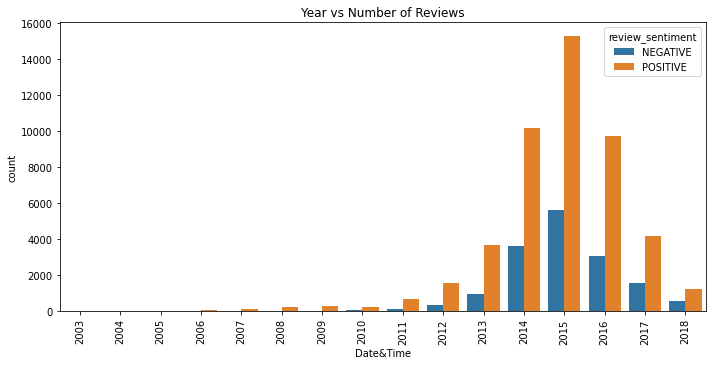

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(data=df_reviews,x=pd.DatetimeIndex(df_reviews['Date&Time']).year,hue=df_reviews["review_sentiment"])

plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Year vs Number of Reviews")
plt.show()

Highest reviews are recorded during the period 2014-2016.

***Reviews vs Price***

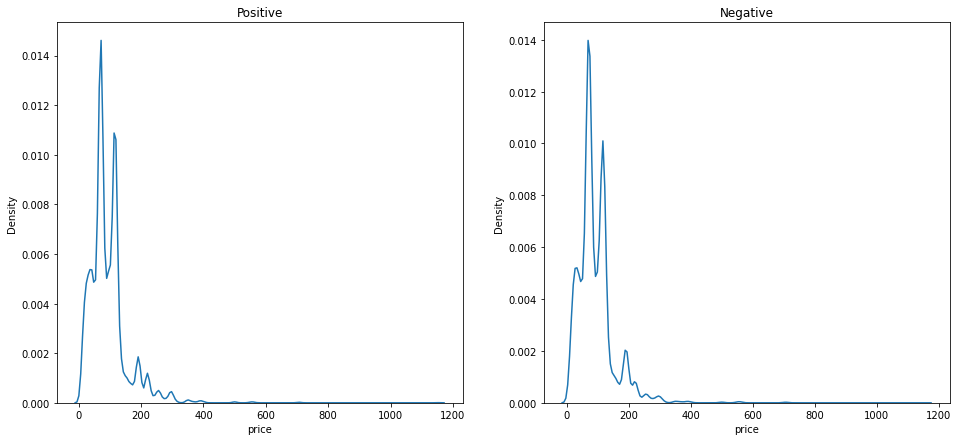

In [ ]:
fig = plt.figure(figsize=(16,7))

ax1 = fig.add_subplot(1, 2, 1, title="Positive")
ax2 = fig.add_subplot(1, 2, 2, title="Negative")

sns.kdeplot(df_reviews[df_reviews["review_sentiment"] == "POSITIVE"]["price"], ax=ax1)
sns.kdeplot(df_reviews[df_reviews["review_sentiment"] == "NEGATIVE"]["price"], ax=ax2)

plt.show()

### **Text Analytics**

In [ ]:
# importing libraries for text analytics
import nltk
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
pd.set_option('max_colwidth', 100)
from sklearn.feature_extraction.text import TfidfVectorizer
import re 

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Web_and_social_media_analytics/stop_words_long.txt')]

**Functions removing stop words , positive and negative words and punctuation marks**

In [ ]:
# function for removing stop words

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def preprocess(document):
    
    # change sentence to lower case
    document = document.lower()

       
    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    
    # take only thos words whose length is greater than 2
    words=[w for w in words if len(w)>2]
    
    # join words to make sentence
    document = " ".join(words)
    
    return document


In [ ]:
# function to remove positive / negative words from document

def remove_words(document):
   # tokenize into words
    words = word_tokenize(document)

    # remove positive/negative words
    words = [word for word in words if word not in positive_words]
    words = [word for word in words if word not in negative_words]
    
    document = " ".join(words)
    
    return document

In [ ]:
# function to remove punctuations
def remove_punctuations(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    
    return text

In [ ]:
# now run lemmatization 

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def apply_lemmatization(document):
     # tokenize into words
         # change sentence to lower case
    document = document.lower()
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    #apply lemmatization
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    words=[w for w in words if len(w)>2]
    
    # join words to make sentence
    document = " ".join(words)
    
    return document

**Preprocessing review text for tableau visualization**

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63838 entries, 0 to 63837
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      63838 non-null  int64  
 1   overall           63838 non-null  float64
 2   verified          63838 non-null  int64  
 3   reviewerID        63838 non-null  object 
 4   asin              63838 non-null  object 
 5   reviewerName      63829 non-null  object 
 6   reviewText        63838 non-null  object 
 7   summary           63821 non-null  object 
 8   unixReviewTime    63838 non-null  int64  
 9   vote              63838 non-null  object 
 10  review_sentiment  63838 non-null  object 
 11  Date&Time         63838 non-null  object 
 12  Unnamed: 0        63838 non-null  int64  
 13  category          63838 non-null  object 
 14  description       63838 non-null  object 
 15  title             63838 non-null  object 
 16  also_buy          63838 non-null  object

In [ ]:
# mapping labels to 0 and 1
df_reviews['review_sentiment'] = df_reviews.review_sentiment.map({'POSITIVE':1, 'NEGATIVE':0})

In [ ]:
# make new dataframe for only reviews and sentiment
df_review_senti=df_reviews[["reviewText","review_sentiment"]]

In [ ]:
df_review_senti["review_text_nostop"]=[preprocess(x) for x in df_review_senti["reviewText"]]

<ipython-input-80-7d138fff82f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_senti["review_text_nostop"]=[preprocess(x) for x in df_review_senti["reviewText"]]


In [ ]:
df_review_senti["review_text_nostop"]

0        phone ugly heavy terrible user interface techies like drops calls like crazy manhattan moto v600...
1        samsung v205 decided try e715 fyi people battery problems batteries drain completely charge like...
2        samsung phone not measure-up v300 tmobile customer finally fed v300 terrible camera tmobile sent...
3        europe phones networks better samsung currently best software huge nokia fan amazingly light int...
4        phone amazingly light camera phone flashlight/flash problems phone real problem battery life wor...
                                                        ...                                                 
63833                                             phone stolen not activate told comes stolen n't appreciate
63834                                                                                                   good
63835       purchased problems finally tossed screens glitching disappointing samsung usually great products
63836              

In [ ]:
# Reading positive words from a text file in to a list
positive_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Web_and_social_media_analytics/pos_words.txt')]

In [ ]:
# Reading negative words from a text file in to a list
negative_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Web_and_social_media_analytics/neg_words.txt')]

In [ ]:
df_review_senti["review_text_nostop"] = df_review_senti['review_text_nostop'].apply(remove_punctuations)

<ipython-input-84-c6e8bdf03852>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_senti["review_text_nostop"] = df_review_senti['review_text_nostop'].apply(remove_punctuations)


In [ ]:
# after removing punctuation marks still there are some stop words so running above function to remove remaining stopwords and do lemmatization.
df_review_senti["review_text_nostop"]=[apply_lemmatization(x) for x in df_review_senti["review_text_nostop"]]

<ipython-input-85-497540a88f40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_senti["review_text_nostop"]=[apply_lemmatization(x) for x in df_review_senti["review_text_nostop"]]


In [ ]:
# divided positive and negative review in different dataframe to create word cloud in tableau

df_positive = df_review_senti[df_review_senti["review_sentiment"]==1][["review_text_nostop","review_sentiment"]]
df_negative = df_review_senti[df_review_senti["review_sentiment"]==0][["review_text_nostop","review_sentiment"]]

In [ ]:
df_positive.head()

,review_text_nostop,review_sentiment
1,samsung decide try fyi people battery problems batteries drain completely charge like build batt...,1
3,europe phone network better samsung currently best software huge nokia fan amazingly light intui...,1
4,phone amazingly light camera phone flashlight flash problems phone real problem battery life wor...,1
5,see explosion nice color phone market functionalities similar extra bonus bell whistle sell prod...,1
6,receive treo friday treocentral service sprint test compare sprint coverage against mobile veriz...,1


In [ ]:
df_negative.head()

,review_text_nostop,review_sentiment
0,phone ugly heavy terrible user interface techies like drop call like crazy manhattan moto better...,0
2,samsung phone not measure tmobile customer finally feed terrible camera tmobile send upgrade goo...,0
12,frank high expectations treo read time lead release actual disappoint front deserve star usable ...,0
22,chicago gps work yes window dozens time surround suburbs work miles north chicago not break unfo...,0
23,not forum people express unhappiness believe reality sprint nextel service problems service rela...,0


In [ ]:
# prepare file for wordcloud negative and positive and export those file 
neg_sentiment_features= df_negative[["review_text_nostop"]]
pos_sentiment_features= df_positive[["review_text_nostop"]]

In [ ]:
pos_sentiment_features.head()

,review_text_nostop
1,samsung decide try fyi people battery problems batteries drain completely charge like build batt...
3,europe phone network better samsung currently best software huge nokia fan amazingly light intui...
4,phone amazingly light camera phone flashlight flash problems phone real problem battery life wor...
5,see explosion nice color phone market functionalities similar extra bonus bell whistle sell prod...
6,receive treo friday treocentral service sprint test compare sprint coverage against mobile veriz...


In [ ]:
neg_sentiment_features.head()

,review_text_nostop
0,phone ugly heavy terrible user interface techies like drop call like crazy manhattan moto better...
2,samsung phone not measure tmobile customer finally feed terrible camera tmobile send upgrade goo...
12,frank high expectations treo read time lead release actual disappoint front deserve star usable ...
22,chicago gps work yes window dozens time surround suburbs work miles north chicago not break unfo...
23,not forum people express unhappiness believe reality sprint nextel service problems service rela...


In [ ]:
lst_pos= [str(w).split(" ") for w in neg_sentiment_features["review_text_nostop"]]
lst_neg= [str(w).split(" ") for w in neg_sentiment_features["review_text_nostop"]]

In [ ]:
#flatten the list
import itertools
merged_pos = list(itertools.chain(*lst_pos))
merged_neg = list(itertools.chain(*lst_neg))

In [ ]:
print(len(merged_pos))
merged_pos

254329


['phone',
 'ugly',
 'heavy',
 'terrible',
 'user',
 'interface',
 'techies',
 'like',
 'drop',
 'call',
 'like',
 'crazy',
 'manhattan',
 'moto',
 'better',
 'phone',
 'take',
 'better',
 'picture',
 'better',
 'clarity',
 'reception',
 'cheaper',
 'moto',
 'mobile',
 'stay',
 'ugly',
 'monster',
 'samsung',
 'phone',
 'not',
 'measure',
 'tmobile',
 'customer',
 'finally',
 'feed',
 'terrible',
 'camera',
 'tmobile',
 'send',
 'upgrade',
 'good',
 'feature',
 'phone',
 'external',
 'antenna',
 'brake',
 'camera',
 'take',
 'better',
 'picture',
 'comfortable',
 'bad',
 'phone',
 'sound',
 'quality',
 'call',
 'receiver',
 'tinny',
 'sound',
 'digital',
 'unlike',
 'not',
 'realize',
 'good',
 'receive',
 'phone',
 'lack',
 'feature',
 'maybe',
 'spoil',
 'phone',
 'not',
 'technology',
 'phone',
 'example',
 'phone',
 'not',
 'easy',
 'datebook',
 'set',
 'alarm',
 'remind',
 'appointments',
 'not',
 'speakerphone',
 'work',
 'well',
 'handy',
 'time',
 'simply',
 'like',
 'commodore'

In [ ]:
df_pos = pd.DataFrame({'col':merged_pos})
df_neg = pd.DataFrame({'col':merged_neg})

In [ ]:
df_pos.to_csv("/content/drive/MyDrive/Web_and_social_media_analytics/pos_sentiment_word.csv")
df_neg.to_csv("/content/drive/MyDrive/Web_and_social_media_analytics/neg_sentiment_word.csv")

**Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Bag of words for Positive Sentiment
positive_reviews= [message for message in pos_sentiment_features['review_text_nostop']]

In [ ]:
# bag of words model
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(positive_reviews)
print(bow_model)

  (0, 20273)	1
  (0, 5673)	1
  (0, 24301)	1
  (0, 9275)	1
  (0, 17049)	1
  (0, 2068)	3
  (0, 18187)	2
  (0, 2066)	1
  (0, 6726)	1
  (0, 4470)	1
  (0, 3736)	1
  (0, 13312)	2
  (0, 3073)	1
  (0, 13265)	2
  (0, 23733)	2
  (0, 11435)	1
  (0, 11353)	1
  (0, 14764)	1
  (0, 5398)	2
  (0, 22232)	1
  (0, 20775)	1
  (0, 9977)	3
  (0, 18869)	1
  (0, 17518)	1
  (0, 26500)	1
  :	:
  (47676, 10674)	2
  (47676, 1572)	1
  (47676, 13644)	1
  (47676, 13341)	2
  (47676, 8377)	1
  (47676, 6004)	1
  (47676, 14685)	1
  (47676, 15760)	1
  (47676, 4057)	1
  (47676, 15813)	1
  (47676, 6023)	1
  (47676, 21471)	1
  (47676, 16332)	1
  (47676, 3759)	1
  (47676, 10347)	2
  (47676, 7470)	1
  (47676, 13078)	1
  (47676, 15786)	1
  (47676, 481)	1
  (47676, 4756)	1
  (47676, 13085)	1
  (47676, 2525)	1
  (47676, 9301)	2
  (47676, 16778)	1
  (47676, 22258)	1


In [ ]:
# look at the dataframe
pd.DataFrame(bow_model.toarray(), columns= vectorizer.get_feature_names_out())

,aaa,aaaa,aaaaa,aaaaammmmaaaaazzzziiiiinnnngggg,aaahs,aac,aacute,aadverts,aall,aand,...,zwh,zxs,zyb,zyeqgses,zynga,zywwhu,zyxel,zzg,zzodc,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#printing the feature names
print(bow_model.shape)
print(vectorizer.get_feature_names_out())

(47677, 27039)
['aaa' 'aaaa' 'aaaaa' ... 'zzg' 'zzodc' 'zzz']


In [ ]:
#printing the vocabulary
vectorizer.vocabulary_

{'samsung': 20273,
 'decide': 5673,
 'try': 24301,
 'fyi': 9275,
 'people': 17049,
 'battery': 2068,
 'problems': 18187,
 'batteries': 2066,
 'drain': 6726,
 'completely': 4470,
 'charge': 3736,
 'like': 13312,
 'build': 3073,
 'life': 13265,
 'time': 23733,
 'improve': 11435,
 'immensely': 11353,
 'mobile': 14764,
 'customer': 5398,
 'stay': 22232,
 'service': 20775,
 'great': 9977,
 'rate': 18869,
 'plan': 17518,
 'work': 26500,
 'additional': 321,
 'feature': 8353,
 'little': 13413,
 'gadget': 9280,
 'caller': 3296,
 'pics': 17385,
 'able': 38,
 'external': 8066,
 'display': 6410,
 'flip': 8707,
 'person': 17166,
 'camera': 3319,
 'flash': 8641,
 'well': 26080,
 'zoom': 27007,
 'picture': 17393,
 'gray': 9967,
 'black': 2460,
 'white': 26189,
 'negative': 15441,
 'sepia': 20733,
 'sketch': 21244,
 'multi': 15123,
 'shoot': 20953,
 'lot': 13605,
 'frame': 8990,
 'download': 6677,
 'game': 9321,
 'whereas': 26158,
 'not': 15779,
 'furthermore': 9243,
 'actually': 271,
 'java': 12364,


**Bag of words for Negative Sentiment**

In [ ]:
negative_reviews= [message for message in neg_sentiment_features['review_text_nostop']]

In [ ]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(negative_reviews)
print(bow_model)

  (0, 7527)	2
  (0, 10806)	2
  (0, 4667)	1
  (0, 10326)	1
  (0, 11104)	1
  (0, 5299)	1
  (0, 10225)	1
  (0, 5805)	2
  (0, 2977)	1
  (0, 1362)	1
  (0, 2195)	1
  (0, 6093)	1
  (0, 6533)	2
  (0, 962)	3
  (0, 10162)	1
  (0, 7562)	1
  (0, 1663)	1
  (0, 8343)	1
  (0, 1549)	1
  (0, 6434)	1
  (0, 9837)	1
  (0, 6495)	1
  (1, 7527)	12
  (1, 10326)	1
  (1, 11104)	1
  :	:
  (16154, 6440)	1
  (16155, 6497)	1
  (16155, 8794)	1
  (16155, 9885)	1
  (16155, 11241)	1
  (16156, 4381)	1
  (16156, 3486)	1
  (16157, 5415)	1
  (16157, 8744)	1
  (16158, 7527)	1
  (16158, 6841)	2
  (16158, 9486)	1
  (16158, 5938)	1
  (16158, 4040)	1
  (16158, 9995)	1
  (16158, 9323)	1
  (16158, 8320)	1
  (16159, 7527)	1
  (16159, 6841)	1
  (16159, 1781)	1
  (16159, 10288)	1
  (16159, 113)	1
  (16159, 9843)	2
  (16159, 529)	1
  (16160, 3486)	1


In [ ]:
neg_vocabular = pd.DataFrame.from_dict(vectorizer.vocabulary_,orient='index')

**Pre-processing the text**

In [ ]:
df_review_senti.head()

,reviewText,review_sentiment,review_text_nostop
0,This phone is ugly and heavy and has a terrible user interface even for techies like myself. It...,0,phone ugly heavy terrible user interface techies like drop call like crazy manhattan moto better...
1,I had the Samsung V205 and then I decided to try the E715 out. FYI to people with battery proble...,1,samsung decide try fyi people battery problems batteries drain completely charge like build batt...
2,This is the first Samsung phone I have had and it does not quite measure-up to the V300. I am a...,0,samsung phone not measure tmobile customer finally feed terrible camera tmobile send upgrade goo...
3,"..and I'm from Europe, where the phones and networks are much better than in the States. I have ...",1,europe phone network better samsung currently best software huge nokia fan amazingly light intui...
4,This phone is amazingly small and light for a camera phone; it even has a flashlight/flash. Prob...,1,phone amazingly light camera phone flashlight flash problems phone real problem battery life wor...


In [ ]:
# remove contraction and make it as normal string 
contractionsMain = {"ain't": "is not", "aren't": "are not","can't": "can not", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def getcontractions(contractionsMain):
    contraction_key = re.compile('(%s)' % '|'.join(contractionsMain.keys()))
    return contractionsMain, contraction_key

contractions, contraction_key = getcontractions(contractionsMain)
def replacecontractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contraction_key.sub(replace, text)

In [ ]:
#function to remove numbers and punctuation marks
puncts_list=['!','@','#','$','%','^','&','*','(',')','-','_','+','=','{','}','[',']',':',';','?','/','\\','|','.','<','>']
def removepuctuationmarks(x):
    x = str(x)
    for punct in puncts_list:
        if punct in x:
            x = x.replace(punct, '')
    return x

In [ ]:
# replace charachter appearing for more than twice in any word to single character 
def replace_multiple_characters(text):
        #repeat_pattern = re.compile(r'(\w)\1*')
        repeat_pattern = re.compile(r'(\w)\1{2,}')
        match_substitution = r'\1\1' 
        new_word = repeat_pattern.sub(match_substitution,text) 
        repeat_pattern1 = re.compile(r'(\w)\1{1,}$')
        match_substitution1 = r'\1' 
        new_word = repeat_pattern1.sub(match_substitution1,new_word) 
        return new_word

In [ ]:
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def preprocessText(document):
     # tokenize into words
         # change sentence to lower case
    document = document.lower()
    words = word_tokenize(document)
    # remove contractions
    words = [ replacecontractions(word) for word in words ]
    
    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    # remove punctuation marks
    
    words=[remove_punctuations(word) for word in words]
    
    words=[replace_multiple_characters(word) for word in words]
    
    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    #apply lemmatization
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    words=[word for word in words if len(word)>2]
    # join words to make sentence
    document = " ".join(words)
    
    return document

In [ ]:
df_review_senti["reviewText"]=[preprocessText(str(x)) for x in df_review_senti["reviewText"]]

<ipython-input-111-02368b1aa0e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_senti["reviewText"]=[preprocessText(str(x)) for x in df_review_senti["reviewText"]]


In [ ]:
# convert to X and y
X = df_reviews.reviewText
y = df_reviews.review_sentiment
print(X.shape)
print(y.shape)

(63838,)
(63838,)


In [ ]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
X_train.head()

42130    Bought this phone for my mom almost a year ago... It works great and she likes it no complaints ...
53310                                                                                                   GOOD
23250    I'm very happy I get the phone as expected, met with the delivery time are very responsible sell...
32825    I purchased this phone as an upgrade to the LG P936 aka LG Optimus True HD LTE.  Absolutely love...
32157                                                                 gift to my granddaughter. she loves it
Name: reviewText, dtype: object

In [ ]:
y_train.head()

42130    1
53310    1
23250    1
32825    1
32157    0
Name: review_sentiment, dtype: int64

In [ ]:
# vectorizing the sentences
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
# printing the vocabulary
vectorizer.vocabulary_

{'bought': 6348,
 'this': 32040,
 'phone': 23981,
 'for': 13983,
 'my': 21454,
 'mom': 21040,
 'almost': 3480,
 'year': 35777,
 'ago': 3248,
 'it': 18027,
 'works': 35448,
 'great': 15340,
 'and': 3702,
 'she': 28717,
 'likes': 19279,
 'no': 22027,
 'complaints': 8378,
 'here': 16086,
 'got': 15165,
 'when': 35031,
 'was': 34756,
 'on': 22622,
 'sale': 27877,
 '99': 2445,
 'so': 29618,
 'happy': 15778,
 'shes': 28744,
 'good': 15081,
 'very': 34268,
 'get': 14796,
 'the': 31912,
 'as': 4237,
 'expected': 12871,
 'met': 20516,
 'with': 35301,
 'delivery': 10138,
 'time': 32232,
 'are': 4123,
 'responsible': 27128,
 'seller': 28437,
 'thanks': 31893,
 'pleased': 24339,
 'purchased': 25489,
 'an': 3677,
 'upgrade': 33837,
 'to': 32341,
 'lg': 19119,
 'p936': 23257,
 'aka': 3342,
 'optimus': 22818,
 'true': 32923,
 'hd': 15921,
 'lte': 19711,
 'absolutely': 2680,
 'love': 19650,
 'is': 17976,
 'fast': 13284,
 'brilliant': 6514,
 'screen': 28217,
 'even': 12547,
 'though': 32068,
 'gen': 14

In [ ]:
# vocab size
len(vectorizer.vocabulary_.keys())

36059

In [ ]:
# transforming the train and test datasets
X_train_transformed = vectorizer.transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [ ]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 2445)	1
  (0, 3248)	1
  (0, 3480)	1
  (0, 3702)	2
  (0, 6348)	1
  (0, 8378)	1
  (0, 13983)	2
  (0, 15165)	1
  (0, 15340)	1
  (0, 15778)	2
  (0, 16086)	1
  (0, 18027)	4
  (0, 19279)	1
  (0, 21040)	1
  (0, 21454)	1
  (0, 22027)	1
  (0, 22622)	1
  (0, 23981)	1
  (0, 27877)	1
  (0, 28717)	1
  (0, 28744)	1
  (0, 29618)	1
  (0, 32040)	1
  (0, 34756)	1
  (0, 35031)	1
  :	:
  (47875, 32040)	1
  (47875, 35301)	1
  (47876, 15081)	1
  (47876, 34268)	1
  (47877, 2680)	1
  (47877, 3702)	1
  (47877, 4237)	1
  (47877, 7007)	1
  (47877, 11670)	1
  (47877, 12636)	1
  (47877, 14297)	1
  (47877, 16298)	1
  (47877, 17976)	1
  (47877, 19650)	1
  (47877, 21454)	1
  (47877, 21866)	1
  (47877, 22146)	1
  (47877, 22622)	1
  (47877, 23981)	1
  (47877, 29406)	1
  (47877, 30342)	1
  (47877, 31445)	1
  (47877, 32040)	1
  (47877, 32341)	1
  (47877, 33839)	1


**Building and evaluating Model**

In [ ]:
# function to plot confusion matrix
def plot_confusion_matrix(confusion_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]

    labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title("Confusion matrix")
    plt.show()

In [ ]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

#Applying the model on train set too
y_pred_train = mnb.predict(X_train_transformed) # returns classes 0 and 1

y_pred_proba_tr = mnb.predict_proba(X_train_transformed) # returns the probability of a review being positive

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [ ]:
# printing  accuracy on train dataset
from sklearn import metrics
y_pred_train = mnb.predict(X_train_transformed)

print ("Accuracy on train dataset :")
metrics.accuracy_score( y_train, y_pred_train)

Accuracy on train dataset :


0.8790467438071766

In [ ]:
# printing the  accuracy on test dataset
from sklearn import metrics
print ("Accuracy on test dataset :")
metrics.accuracy_score(y_test, y_pred_class)

Accuracy on test dataset :


0.8649749373433584

**Confusion Matrix for train dataset**

In [ ]:
# confusion matrix
confusion_train =metrics.confusion_matrix(y_train, y_pred_train)
print(confusion_train)

[[ 8366  3789]
 [ 2002 33721]]


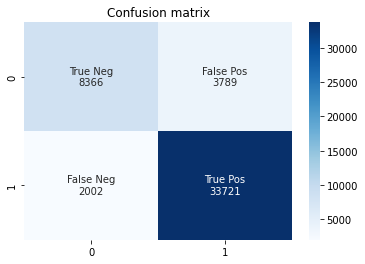

In [ ]:
# ploting confusion matrix
plot_confusion_matrix(confusion_train)

**Confusion Matrix for test dataset**

In [ ]:
# confusion matrix
confusion_test =metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_test)

[[ 2524  1482]
 [  673 11281]]


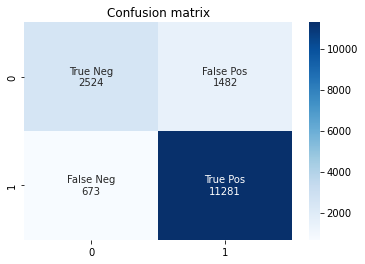

In [ ]:
# ploting confusion matrix
plot_confusion_matrix(confusion_test)

In [ ]:
# for train dataset
TN_train = confusion_train[0, 0]
FP_train = confusion_train[0, 1]
FN_train = confusion_train[1, 0]
TP_train = confusion_train[1, 1]

In [ ]:
# for test datset
TN_test = confusion_test[0, 0]
FP_test = confusion_test[0, 1]
FN_test = confusion_test[1, 0]
TP_test = confusion_test[1, 1]

**Sensitivity Metrics**

Sensitivity (True Positive Rate) is a measure of the proportion of actual positive cases that got predicted as positive.

Specificity (True Negative Rate) is defined as the proportion of actual negatives, which got predicted as the negative (or true negative).

Sensitivity and Specificity measures are used to plot the ROC curve. And, Area under ROC curve (AUC) is used to determine the model performance.

In [ ]:
#Sensitivity Metrics

sensitivity_train = TP_train / float(FN_train + TP_train)
sensitivity_test = TP_test / float(FN_test + TP_test)
print("sensitivity on train dataset",sensitivity_train)
print("sensitivity on test dataset",sensitivity_test)

sensitivity on train dataset 0.9439576743274641
sensitivity on test dataset 0.9437008532708717


In [ ]:
#Specificity Metrics

specificity_train = TN_train / float(TN_train + FP_train)
specificity_test = TN_test / float(TN_test + FP_test)
print("specificity on train dataset",specificity_train)
print("specificity on train dataset",specificity_test)

specificity on train dataset 0.6882764294529
specificity on train dataset 0.6300549176235647


In [ ]:
#Precision Metrics

precision_train = TP_train / float(TP_train + FP_train)
precision_test = TP_test / float(TP_test + FP_test)
print("precision on train dataset",precision_train)
print("precision on test dataset",precision_test)

precision on train dataset 0.8989869368168488
precision on test dataset 0.8838830995847371


In [ ]:
# Recall Metrics

print("RECALL SCORE on train dataset :", metrics.recall_score(y_train, y_pred_train))
print("RECALL SCORE on test dataset :", metrics.recall_score(y_test, y_pred_class))

RECALL SCORE on train dataset : 0.9439576743274641
RECALL SCORE on test dataset : 0.9437008532708717


In [ ]:
# F1 Score

print("F1 SCORE for train dataset :",metrics.f1_score(y_train, y_pred_train))
print("F1 SCORE for test dataset :",metrics.f1_score(y_test, y_pred_class))

F1 SCORE for train dataset : 0.9209236273264784
F1 SCORE for test dataset : 0.9128130436541652


In [ ]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

In [ ]:
# for train dataset
false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, y_pred_proba_tr[:,1])
roc_auc_tr = auc(false_positive_rate_tr, true_positive_rate_tr)

In [ ]:
# for test dataset
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
# area under the curve
print (roc_auc)

0.8898768189525984


In [ ]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.113184,0.008238
2,1.000000e+00,0.115275,0.008238
3,1.000000e+00,0.115359,0.008238
4,1.000000e+00,0.118621,0.008487
...,...,...,...
3348,7.009097e-47,0.999749,0.998752
3349,1.186381e-61,0.999749,0.999750
3350,1.443856e-64,0.999833,0.999750
3351,1.065334e-121,0.999833,1.000000


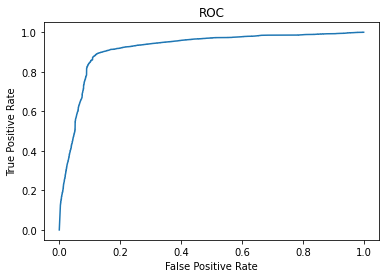

In [ ]:
# plotting the ROC curve for train set
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate_tr, true_positive_rate_tr)

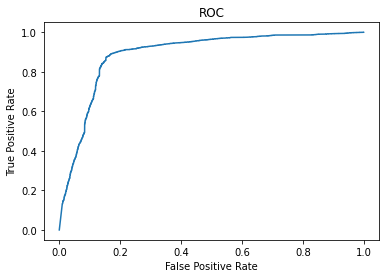

In [ ]:
# plotting the ROC curve for test set
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

In [ ]:
# Printing the classification report
print("report for train set")
print(classification_report(y_train, y_pred_train))
print("report for test set")
print(classification_report(y_test, y_pred_class))

report for train set
              precision    recall  f1-score   support

           0       0.81      0.69      0.74     12155
           1       0.90      0.94      0.92     35723

    accuracy                           0.88     47878
   macro avg       0.85      0.82      0.83     47878
weighted avg       0.88      0.88      0.88     47878

report for test set
              precision    recall  f1-score   support

           0       0.79      0.63      0.70      4006
           1       0.88      0.94      0.91     11954

    accuracy                           0.86     15960
   macro avg       0.84      0.79      0.81     15960
weighted avg       0.86      0.86      0.86     15960

